I changed core_variables.f90 to initialize NH4 to 1 everywhere rather than 0 in upper 3 m, and the step in bio and chem near 3 m went away. 

In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import pytz

%matplotlib inline

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGR07/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')

In [3]:
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

In [4]:
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=202)
# Timestamp in matplotlib time
# dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400

In [5]:
interval=float(interval)
print interval

0.042


In [6]:
# Extract dataframe chunks into dictionary

for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
        
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1)
tt,zz=np.meshgrid(t,-z)

In [7]:
print field_names

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


In [8]:
field_names[1]

'temperature'

In [9]:
print z.size
print t.size
print da[:,12,:].shape

202
961
(202, 961)


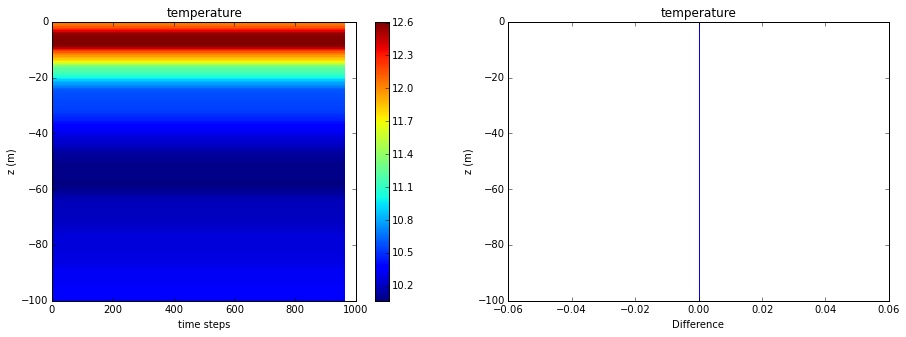

In [10]:
iii=1

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

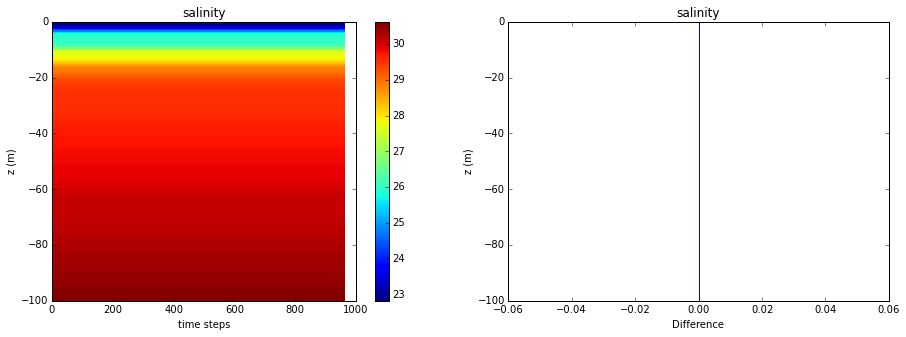

In [11]:
iii=2

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

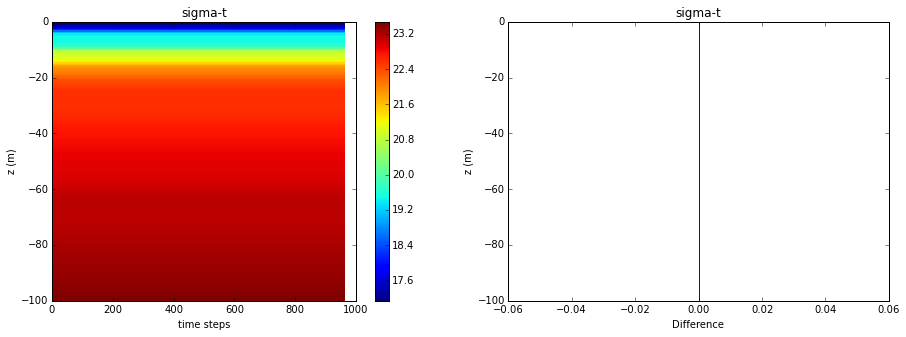

In [12]:
iii=3
fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

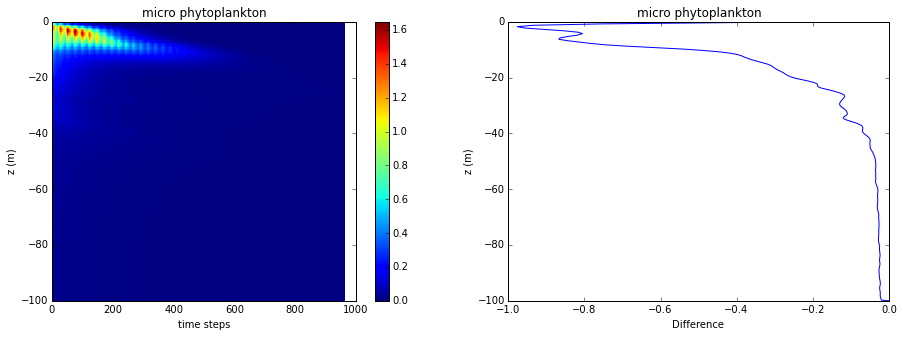

In [13]:
iii=4

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

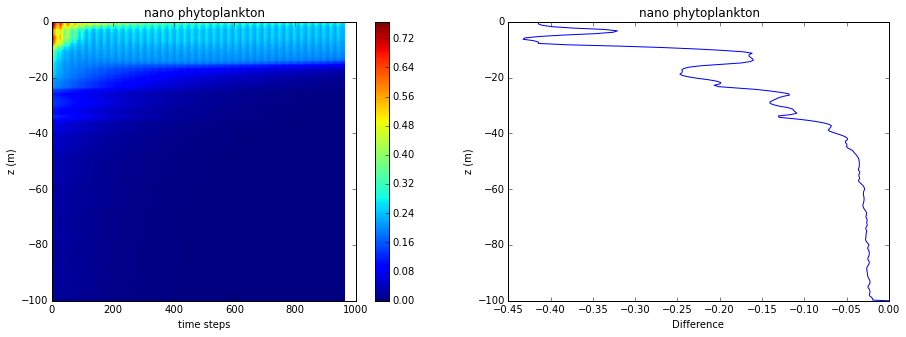

In [14]:
iii=5

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

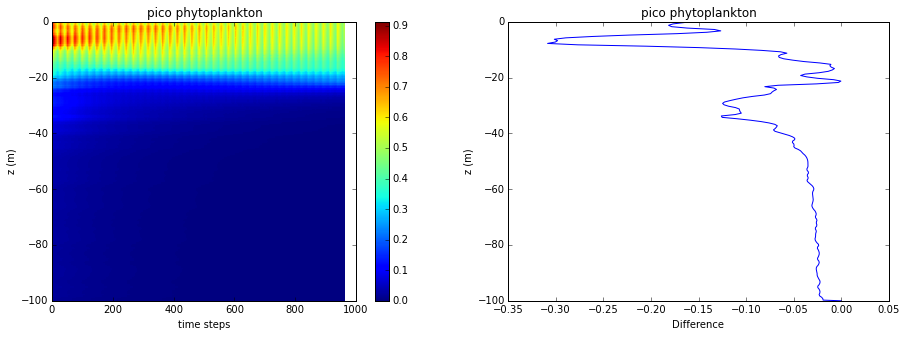

In [15]:
iii=6

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

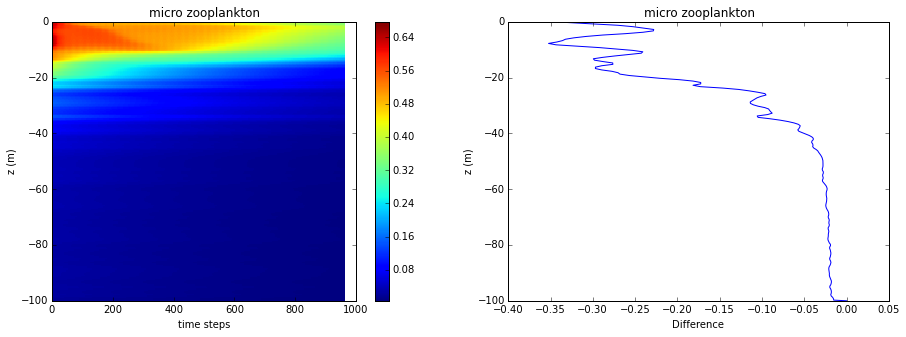

In [16]:
iii=7

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

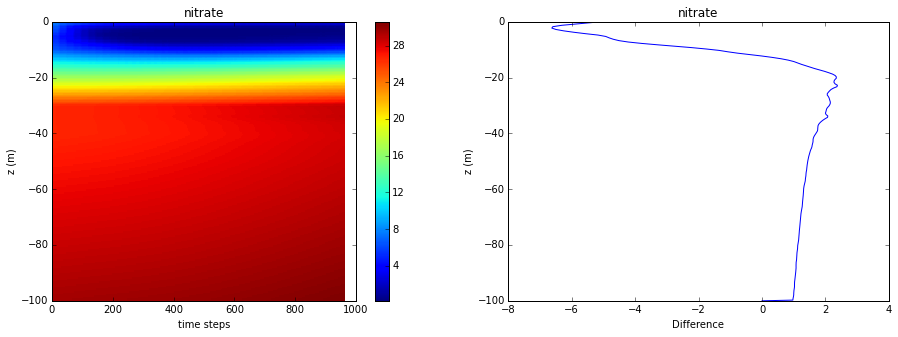

In [17]:
iii=8

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

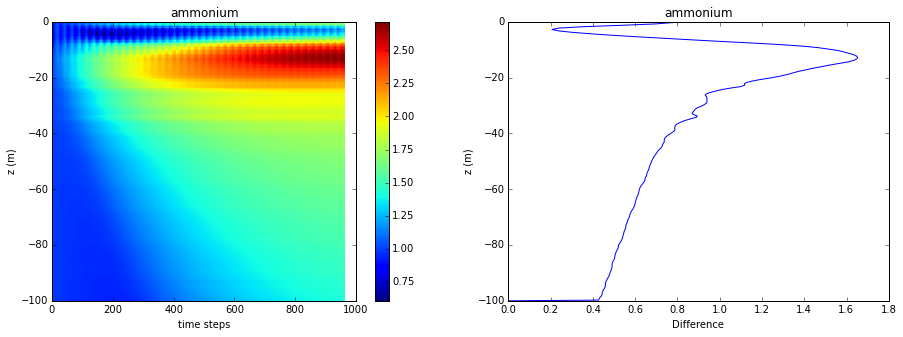

In [30]:
iii=9

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

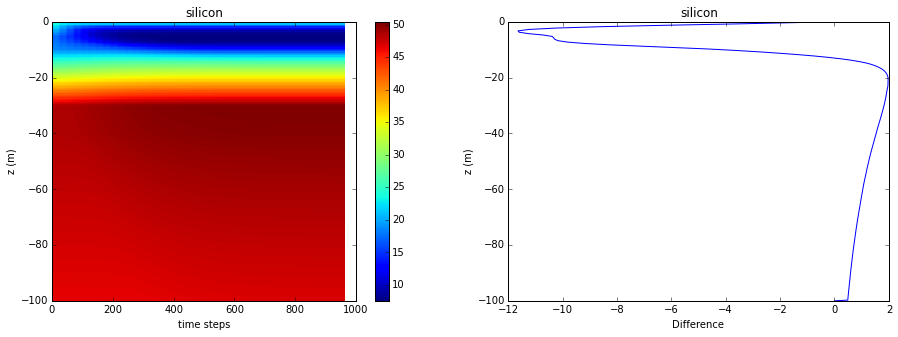

In [19]:
iii=10

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

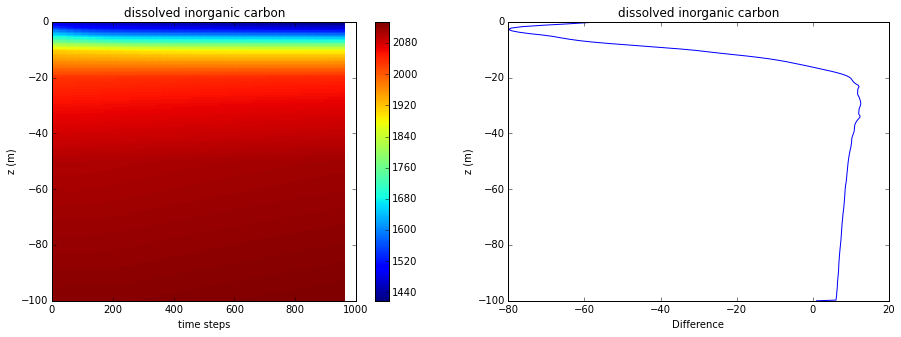

In [20]:
iii=11

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

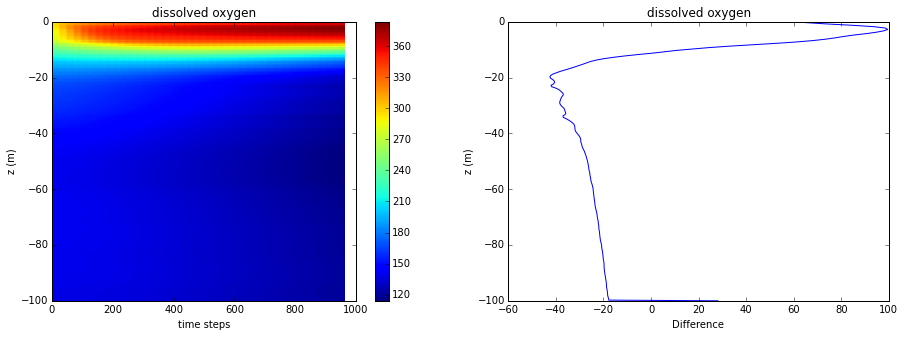

In [21]:
iii=12

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

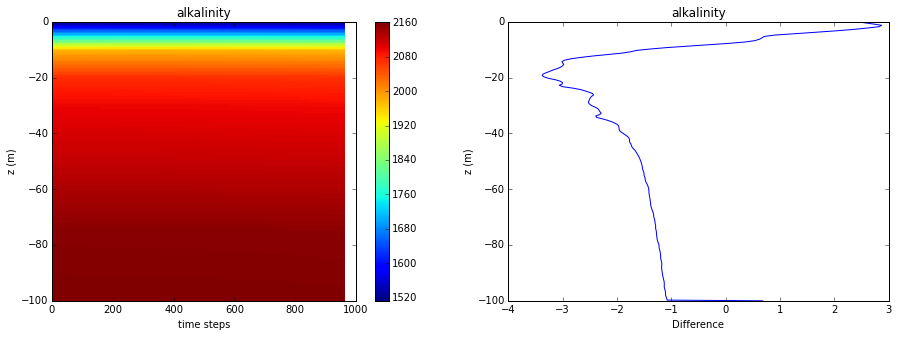

In [22]:
iii=13

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

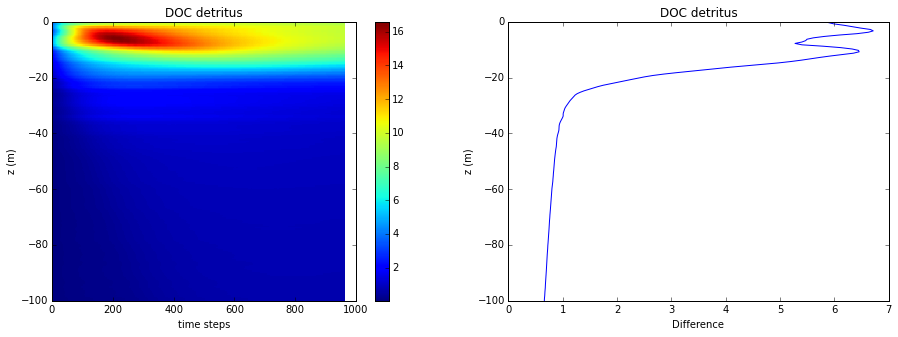

In [23]:
iii=14

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

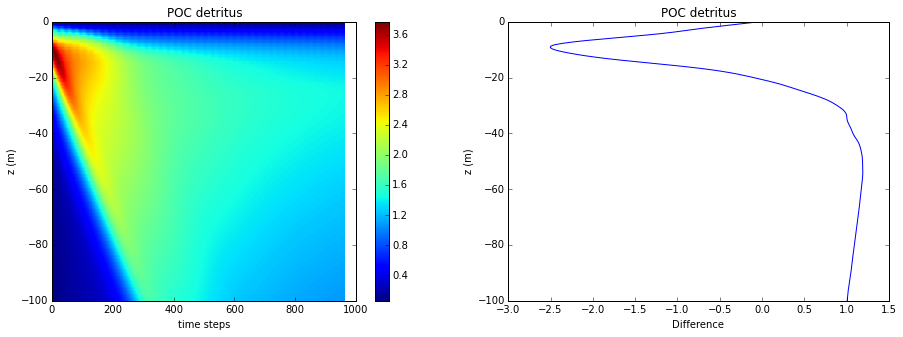

In [24]:
iii=15

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

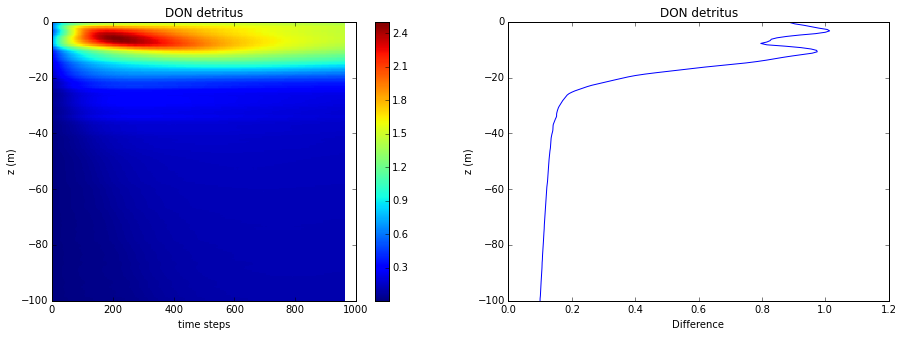

In [25]:
iii=16

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

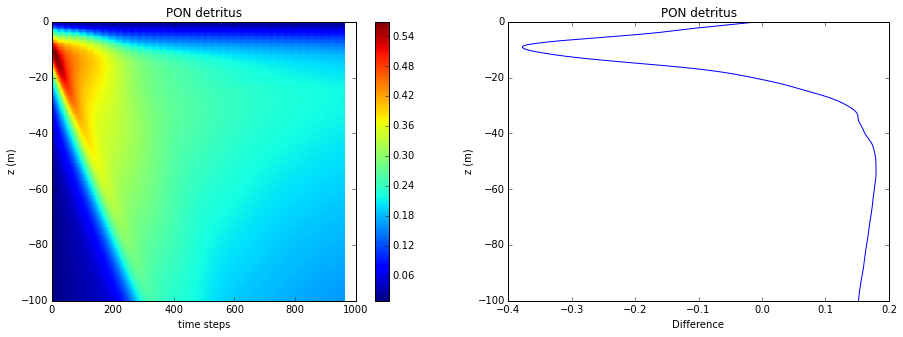

In [26]:
iii=17

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

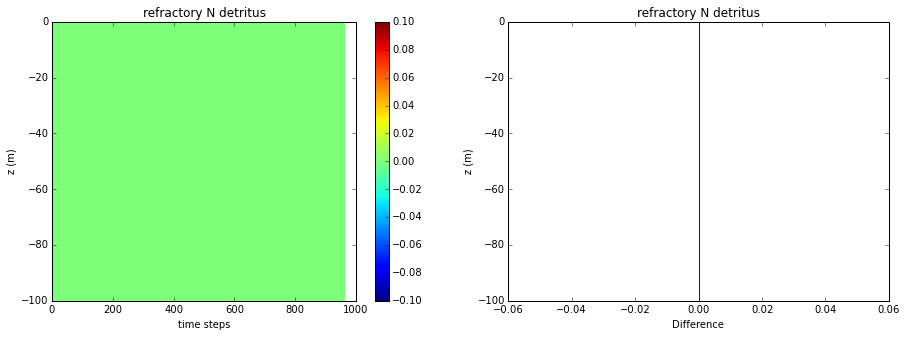

In [27]:
iii=18

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

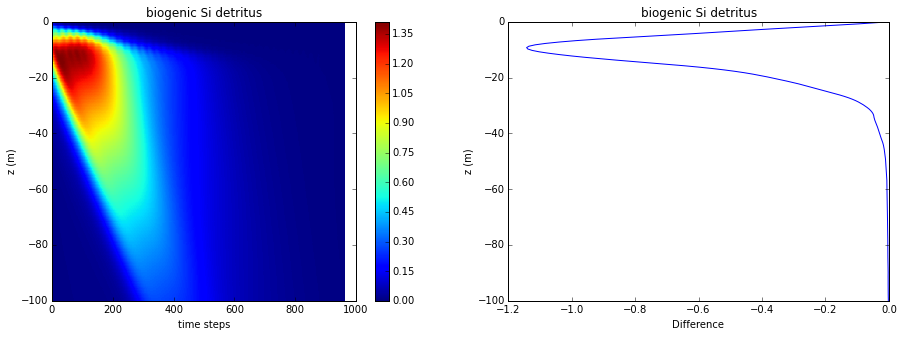

In [28]:
iii=19

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

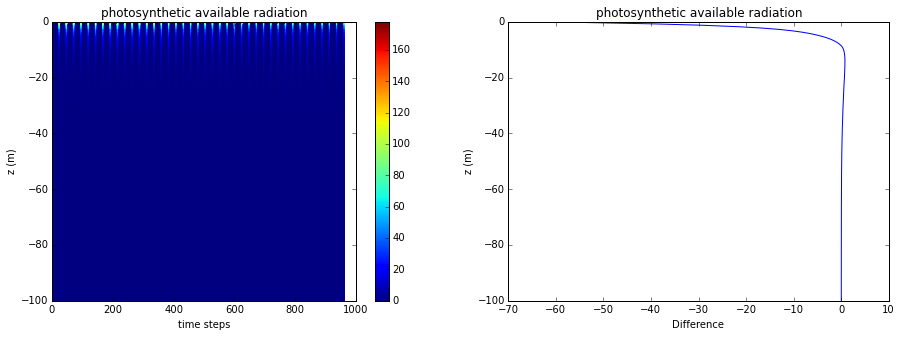

In [29]:
iii=23

fig, axs = plt.subplots(1,2,figsize=(15,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])